In [49]:
from music21 import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.callbacks import History

Using TensorFlow backend.


Zacznijmy od prostego, dwuwymiarowego przypadku, dzięki któremu będziemy mogli przyglądnąć się naszym wynikom:

In [2]:
bach = pd.read_csv('bach.csv')
bach = bach[["liczby_nut", "dokladnosci_tonacji"]]
bach= bach.astype(float)

bach

,liczby_nut,dokladnosci_tonacji
0,214.0,0.907392
1,208.0,0.948021
2,228.0,0.958867
3,247.0,0.935147
4,199.0,0.972617
...,...,...
357,50.0,0.908990
358,45.0,0.791180
359,56.0,0.940300
360,860.0,0.930243


In [3]:
palestrina = pd.read_csv('palestrina.csv')
palestrina = palestrina[["liczby_nut", "dokladnosci_tonacji"]]
palestrina = palestrina.astype(float)

palestrina

,liczby_nut,dokladnosci_tonacji
0,587.0,0.876323
1,627.0,0.844736
2,513.0,0.865842
3,1065.0,0.904660
4,373.0,0.928705
...,...,...
1313,244.0,0.922416
1314,224.0,0.898357
1315,404.0,0.853625
1316,215.0,0.775142


In [4]:
ryans = pd.read_csv('ryans.csv')
ryans = ryans[["liczby_nut", "dokladnosci_tonacji"]]
ryans = ryans.astype(float)

ryans

,liczby_nut,dokladnosci_tonacji
0,192.0,0.852309
1,115.0,0.806914
2,136.0,0.723191
3,122.0,0.855020
4,131.0,0.818891
...,...,...
1054,67.0,0.778201
1055,109.0,0.885951
1056,115.0,0.785784
1057,78.0,0.910583


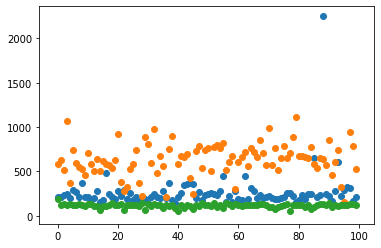

In [5]:
plt.scatter(np.arange(100), bach[:100]["liczby_nut"])
plt.scatter(np.arange(100), palestrina[:100]["liczby_nut"])
plt.scatter(np.arange(100), ryans[:100]["liczby_nut"])

plt.show()

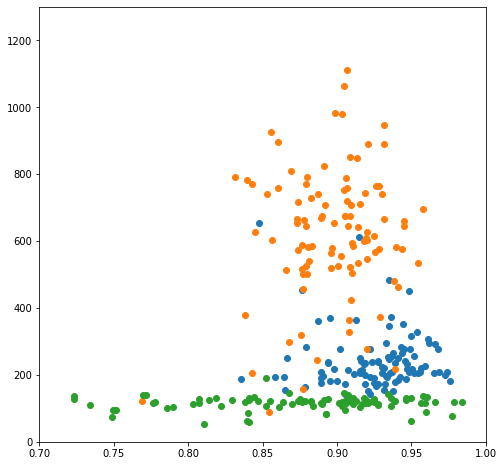

In [6]:
#plt.figure(figsize=(8,8));
#axes = plt.gca()
#axes.set_xlim([0,35])
#axes.set_ylim([0,1200])
#plt.scatter(bach[:100]["rozstawy_dzwiekow"], bach[:100]["liczby_nut"])
#plt.scatter(palestrina[:100]["rozstawy_dzwiekow"], palestrina[:100]["liczby_nut"])
#plt.scatter(ryans[:100]["rozstawy_dzwiekow"], ryans[:100]["liczby_nut"])

#plt.show()


plt.figure(figsize=(8,8));
axes = plt.gca()
axes.set_xlim([0.7,1])
axes.set_ylim([0,1300])
plt.scatter(bach[:100]["dokladnosci_tonacji"], bach[:100]["liczby_nut"])
plt.scatter(palestrina[:100]["dokladnosci_tonacji"], palestrina[:100]["liczby_nut"])
plt.scatter(ryans[:100]["dokladnosci_tonacji"], ryans[:100]["liczby_nut"])

plt.show()

In [7]:
'''
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,1200])
ax.scatter(bach[:100]["rozstawy_dzwiekow"], bach[:100]["liczby_nut"], bach[:100]["dokladnosci_tonacji"])
ax.scatter(palestrina[:100]["rozstawy_dzwiekow"], palestrina[:100]["liczby_nut"], palestrina[:100]["dokladnosci_tonacji"])
ax.scatter(ryans[:100]["rozstawy_dzwiekow"], ryans[:100]["liczby_nut"], ryans[:100]["dokladnosci_tonacji"])

plt.show()
'''

'\nfrom mpl_toolkits.mplot3d import Axes3D\n\nfig = plt.figure(figsize=(8,8))\nax = fig.add_subplot(111, projection=\'3d\')\naxes = plt.gca()\naxes.set_xlim([0,20])\naxes.set_ylim([0,1200])\nax.scatter(bach[:100]["rozstawy_dzwiekow"], bach[:100]["liczby_nut"], bach[:100]["dokladnosci_tonacji"])\nax.scatter(palestrina[:100]["rozstawy_dzwiekow"], palestrina[:100]["liczby_nut"], palestrina[:100]["dokladnosci_tonacji"])\nax.scatter(ryans[:100]["rozstawy_dzwiekow"], ryans[:100]["liczby_nut"], ryans[:100]["dokladnosci_tonacji"])\n\nplt.show()\n'

Łączę dane w jedną DataFrame i dzielę na train i test:

In [8]:
X = bach.append(palestrina, ignore_index=True)
X = X.append(ryans, ignore_index = True)
y = [0]*362 + [1]*1318 + [2]*1059
X = np.array(X)
print(X.shape)
y = np.array(y)
print(y.shape)
X

(2739, 2)
(2739,)


array([[214.        ,   0.9073918 ],
       [208.        ,   0.9480214 ],
       [228.        ,   0.95886687],
       ...,
       [115.        ,   0.7857839 ],
       [ 78.        ,   0.91058297],
       [122.        ,   0.86997151]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Skalowanie danych:

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

1. Softmax Regression:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


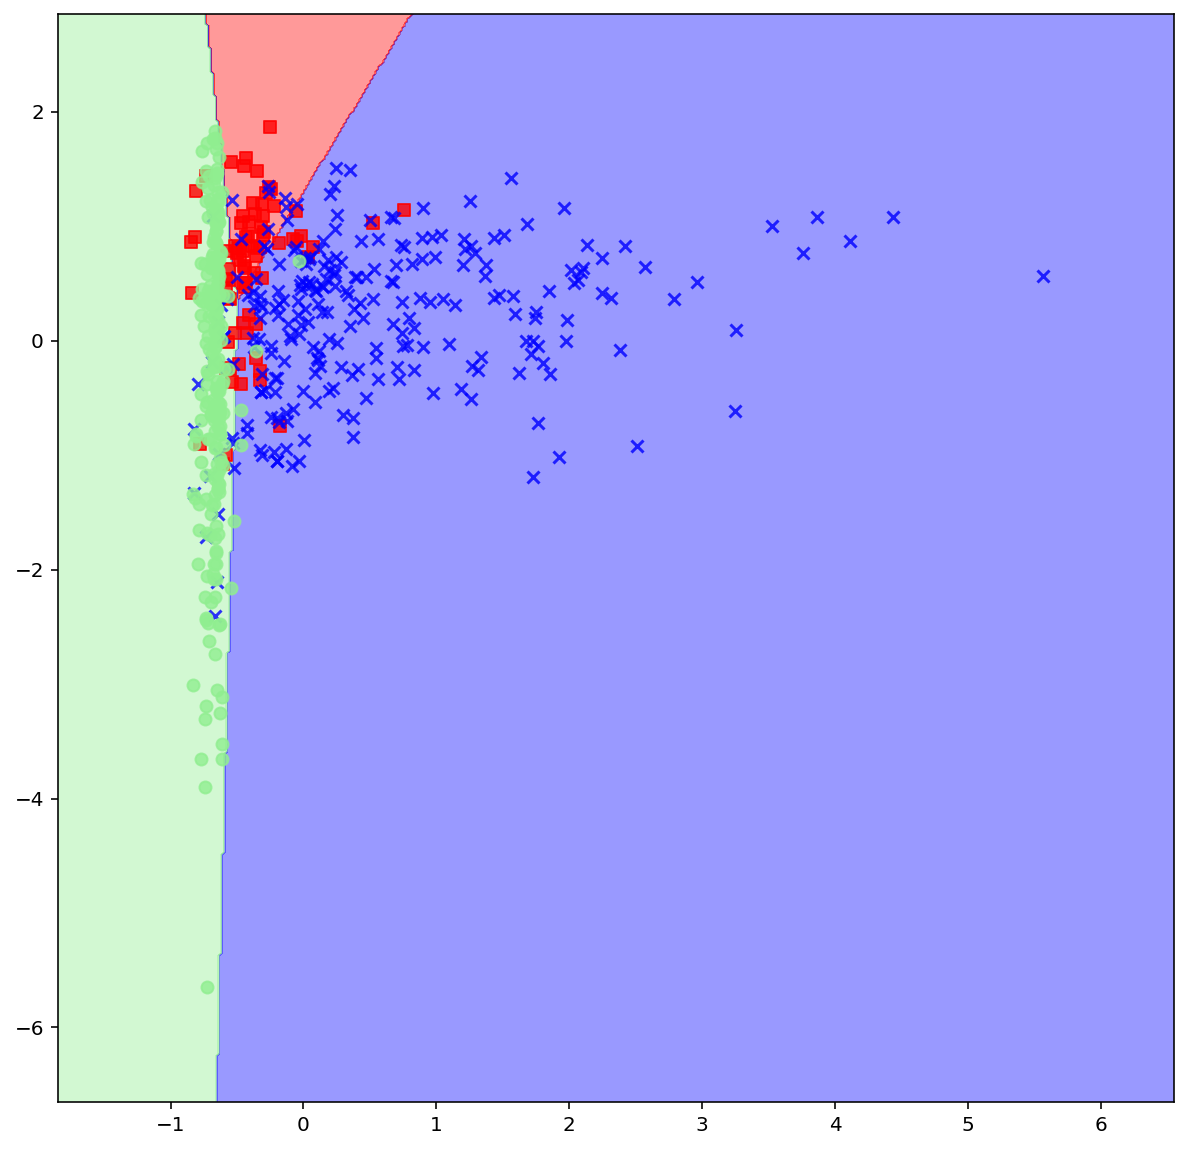

In [26]:
from sklearn.linear_model import LogisticRegression

softmax = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42) 
softmax.fit(X_train, y_train)
# dobrac C gridsearchem?

model = softmax
plt.figure(figsize=(10, 10))
plot_decision_regions(X_test, y_test, model)
plt.show()

2. Decision Tree:

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.8260257853209603
0.822992700729927
0.8242853486418464
0.822992700729927


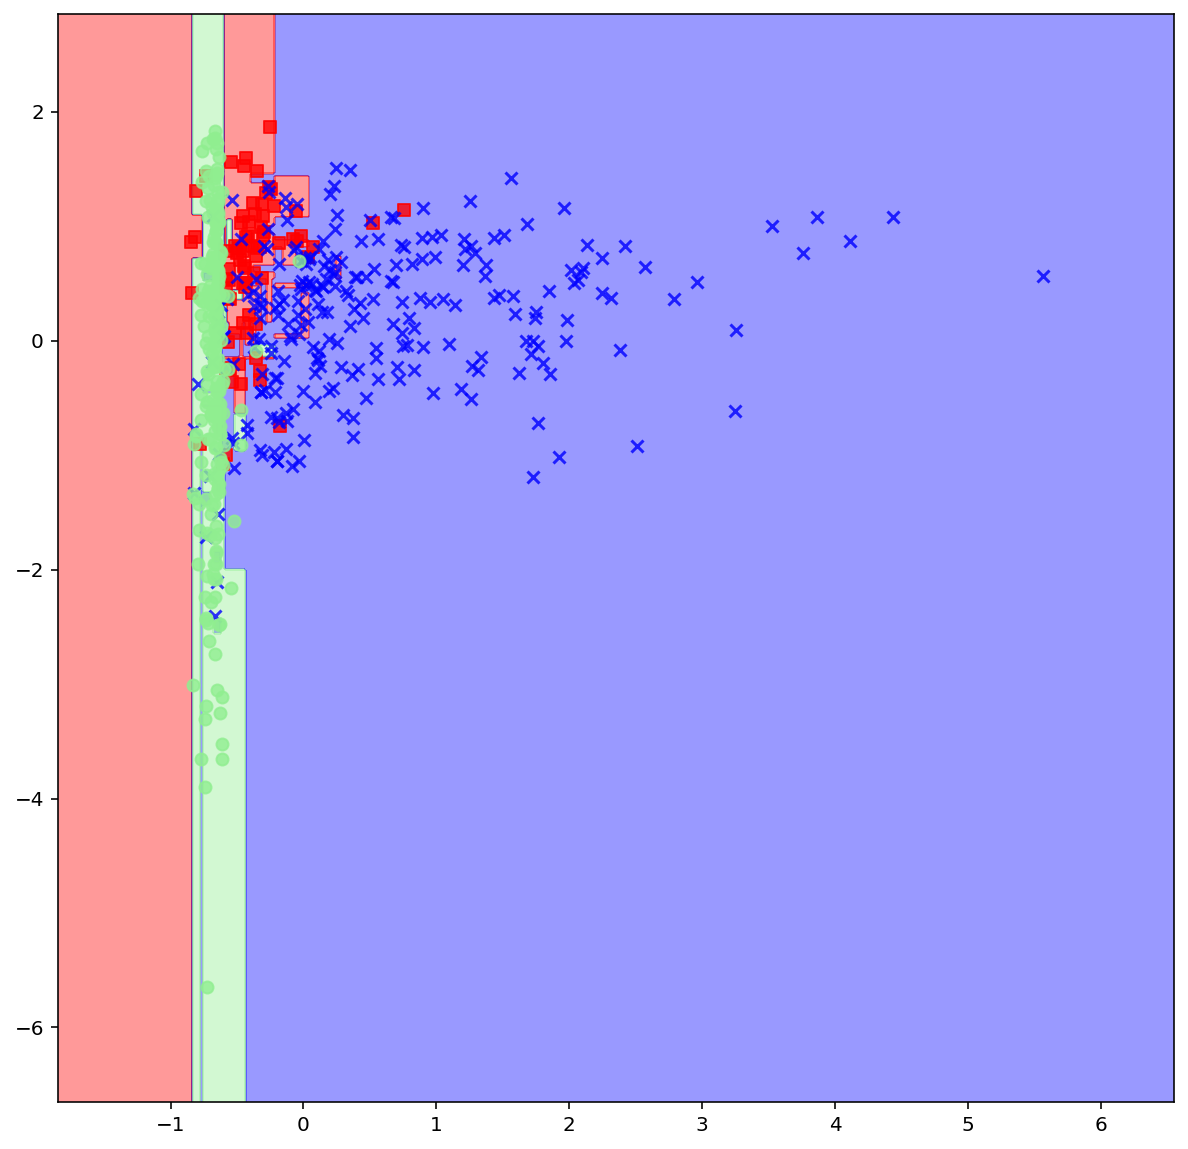

In [22]:
from sklearn import  metrics
from help_plot import plot_decision_regions

model = tree
print(metrics.precision_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.recall_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.f1_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(10, 10))
plot_decision_regions(X_test, y_test, model)
plt.show()



3. Random Forest:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


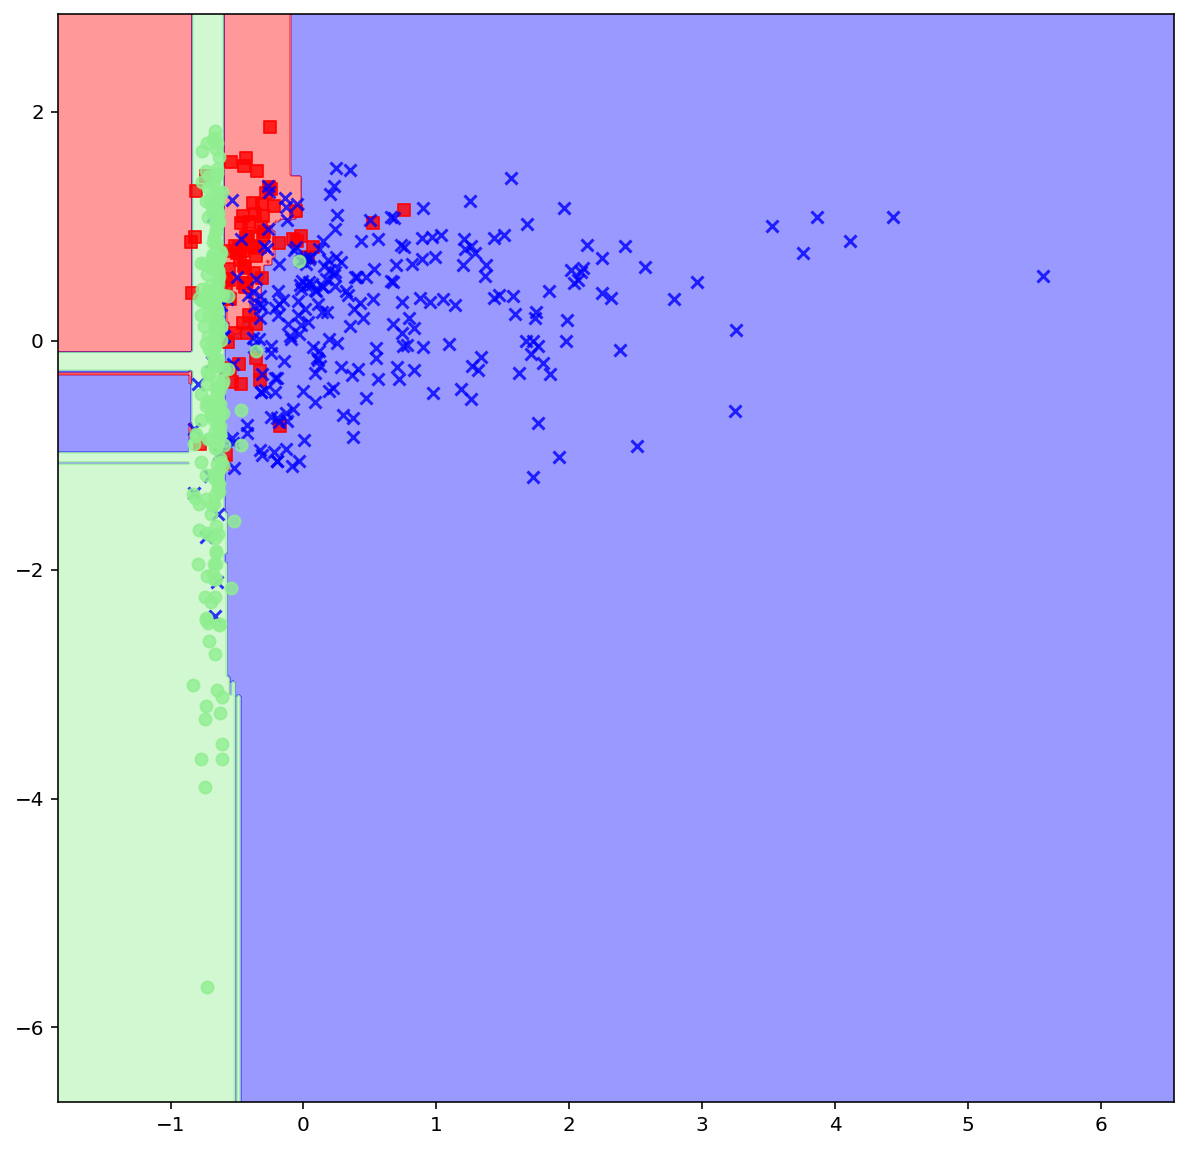

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, max_leaf_nodes=20, n_jobs=-1, random_state=42)
forest.fit(X_train, y_train)

model = forest
plt.figure(figsize=(10, 10))
plot_decision_regions(X_test, y_test, model)
plt.show()

Porównanie metod dla danych dwuwymiarowych:

In [34]:
models = [softmax, tree, forest]


precision = []
recall = []
f1 = []
accuracy = []


for model in models:
    precision.append(metrics.precision_score(y_test, model.predict(X_test), average = "weighted"))
    recall.append(metrics.recall_score(y_test, model.predict(X_test), average = "weighted"))
    f1.append(metrics.f1_score(y_test, model.predict(X_test), average = "weighted"))
    accuracy.append(metrics.accuracy_score(y_test, model.predict(X_test)))


d = {'precision': precision,
     'recall' : recall,
     'f1': f1,
     'accuracy': accuracy
    }

df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=["softmax", "tree", "forest"])
df

,Method,precision,recall,f1,accuracy
0,softmax,0.856014,0.859489,0.850239,0.859489
1,tree,0.826026,0.822993,0.824285,0.822993
2,forest,0.874614,0.877737,0.875464,0.877737


WYKORZYSTUJEMY WSZYSTKIE DOSTĘPNE PARAMETRY:

Preprocessing:

In [66]:
bach = pd.read_csv('bach.csv')
palestrina = pd.read_csv('palestrina.csv')
ryans = pd.read_csv('ryans.csv')

In [70]:
bach["liczby_uzytych_metrum"].value_counts()
palestrina["liczby_uzytych_metrum"].value_counts()

1    1318
Name: liczby_uzytych_metrum, dtype: int64

In [73]:
bach["liczby_uzytych_tonacji"].value_counts()
palestrina["liczby_uzytych_tonacji"].value_counts()

1    1318
Name: liczby_uzytych_tonacji, dtype: int64

Dane z powyższych dwóch kolumn są nieprzydatne, więc ich nie ma sensu przetwarzać i nie będziemy ich brać pod uwagę.
Zajmijmy się missing data:

In [37]:
bach = bach[["liczby_nut", "dokladnosci_tonacji", "pauzy", "rozstawy_dzwiekow", "najwyzsze_dzwieki", "najnizsze_dzwieki"]]
bach= bach.astype(float)

palestrina = palestrina[["liczby_nut", "dokladnosci_tonacji" , "pauzy", "rozstawy_dzwiekow", , "najwyzsze_dzwieki", "najnizsze_dzwieki"]]
palestrina = palestrina.astype(float)

ryans = ryans[["liczby_nut", "dokladnosci_tonacji", "pauzy", "rozstawy_dzwiekow"]]
ryans = ryans.astype(float)

In [38]:
X = bach.append(palestrina, ignore_index=True)
X = X.append(ryans, ignore_index = True)
y = [0]*362 + [1]*1318 + [2]*1059
X = np.array(X)
y = np.array(y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Modele dla pełnych danych:

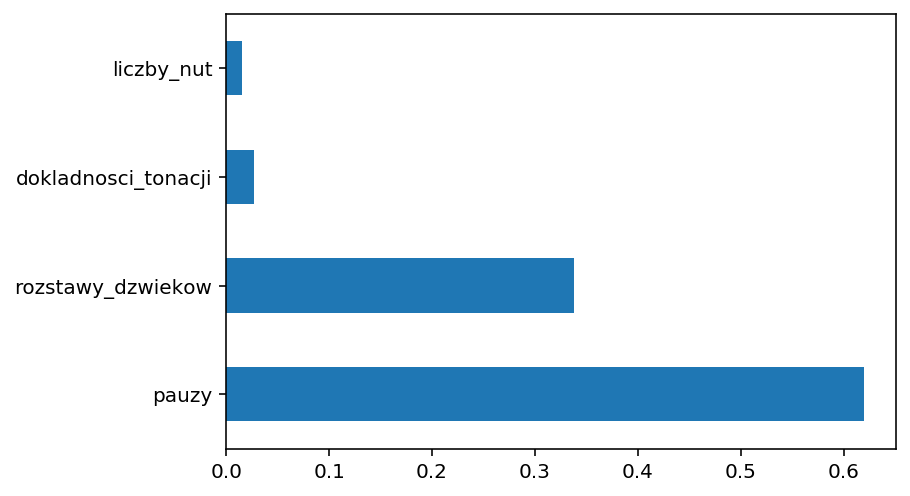

In [43]:
tree2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree2.fit(X_train, y_train)

feat_importances = pd.Series(tree2.feature_importances_, index = ["liczby_nut", "dokladnosci_tonacji" , "pauzy", "rozstawy_dzwiekow"])
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

In [60]:
history1 = History()
neural = Sequential()
neural.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
neural.add(Dense(10,activation="sigmoid"))
neural.add(Dense(3,activation="sigmoid"))
neural.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 33        
Total params: 1,543
Trainable params: 1,543
Non-trainable params: 0
_________________________________________________________________


In [61]:
from keras.utils import to_categorical
y_binary = to_categorical(y_train)

early_stopping = EarlyStopping(patience=20,monitor="val_loss")
neural.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
neural.fit(X_train, y_binary, validation_split=0.25,epochs=100,callbacks=[early_stopping, history1])

Train on 1643 samples, validate on 548 samples
Epoch 1/100
1643/1643 [==============================] - 0s 91us/step - loss: 1.0159 - categorical_accuracy: 0.4583 - val_loss: 0.9833 - val_categorical_accuracy: 0.4653
Epoch 2/100
1643/1643 [==============================] - 0s 41us/step - loss: 0.9568 - categorical_accuracy: 0.5606 - val_loss: 0.9382 - val_categorical_accuracy: 0.6606
Epoch 3/100
1643/1643 [==============================] - 0s 44us/step - loss: 0.9007 - categorical_accuracy: 0.7273 - val_loss: 0.8623 - val_categorical_accuracy: 0.7609
Epoch 4/100
1643/1643 [==============================] - 0s 46us/step - loss: 0.8147 - categorical_accuracy: 0.7815 - val_loss: 0.7708 - val_categorical_accuracy: 0.7956
Epoch 5/100
1643/1643 [==============================] - 0s 44us/step - loss: 0.7304 - categorical_accuracy: 0.8016 - val_loss: 0.6839 - val_categorical_accuracy: 0.8047
Epoch 6/100
1643/1643 [==============================] - 0s 41us/step - loss: 0.6465 - categorical_accu

Epoch 49/100
1643/1643 [==============================] - 0s 37us/step - loss: 0.1230 - categorical_accuracy: 0.9641 - val_loss: 0.1135 - val_categorical_accuracy: 0.9708
Epoch 50/100
1643/1643 [==============================] - 0s 33us/step - loss: 0.1225 - categorical_accuracy: 0.9671 - val_loss: 0.1136 - val_categorical_accuracy: 0.9690
Epoch 51/100
1643/1643 [==============================] - 0s 36us/step - loss: 0.1208 - categorical_accuracy: 0.9684 - val_loss: 0.1106 - val_categorical_accuracy: 0.9690
Epoch 52/100
1643/1643 [==============================] - 0s 33us/step - loss: 0.1203 - categorical_accuracy: 0.9671 - val_loss: 0.1098 - val_categorical_accuracy: 0.9708
Epoch 53/100
1643/1643 [==============================] - 0s 36us/step - loss: 0.1188 - categorical_accuracy: 0.9696 - val_loss: 0.1086 - val_categorical_accuracy: 0.9653
Epoch 54/100
1643/1643 [==============================] - 0s 33us/step - loss: 0.1193 - categorical_accuracy: 0.9665 - val_loss: 0.1079 - val_cat

Epoch 97/100
1643/1643 [==============================] - 0s 35us/step - loss: 0.1021 - categorical_accuracy: 0.9720 - val_loss: 0.0927 - val_categorical_accuracy: 0.9763
Epoch 98/100
1643/1643 [==============================] - 0s 36us/step - loss: 0.1019 - categorical_accuracy: 0.9720 - val_loss: 0.0938 - val_categorical_accuracy: 0.9726
Epoch 99/100
1643/1643 [==============================] - 0s 38us/step - loss: 0.1020 - categorical_accuracy: 0.9714 - val_loss: 0.0914 - val_categorical_accuracy: 0.9763
Epoch 100/100
1643/1643 [==============================] - 0s 35us/step - loss: 0.1024 - categorical_accuracy: 0.9696 - val_loss: 0.0933 - val_categorical_accuracy: 0.9708


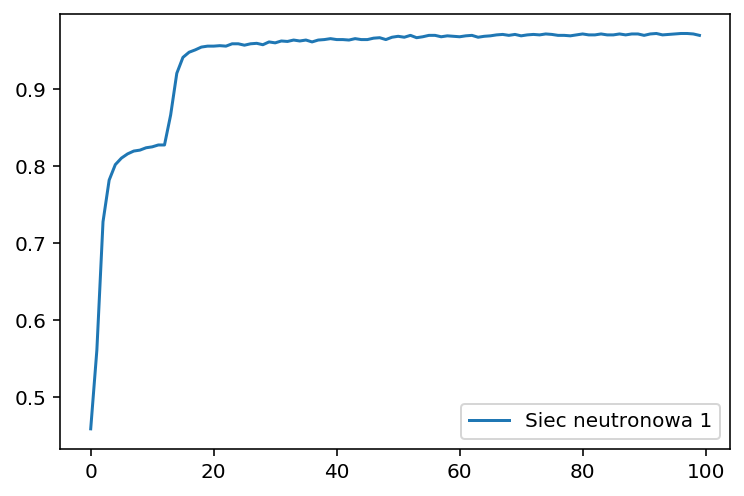

In [64]:
plt.plot(history1.history['categorical_accuracy'], label = "Siec neutronowa 1")

plt.legend()
plt.show()

In [62]:
models = [tree2, neural]


precision = []
recall = []
f1 = []
accuracy = []


for model in models:
    precision.append(metrics.precision_score(y_test, model.predict(X_test), average = "weighted"))
    recall.append(metrics.recall_score(y_test, model.predict(X_test), average = "weighted"))
    f1.append(metrics.f1_score(y_test, model.predict(X_test), average = "weighted"))
    accuracy.append(metrics.accuracy_score(y_test, model.predict(X_test)))


d = {'precision': precision,
     'recall' : recall,
     'f1': f1,
     'accuracy': accuracy
    }

df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=["tree2","neural"])
df

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets